In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv(r"/content/Crop Production data.csv")
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
69119,Haryana,MEWAT,2005,Kharif,Urad,13.0,NaN
69120,Haryana,MEWAT,2005,Rabi,Barley,1873.0,6000.0
69121,Haryana,MEWAT,2005,Rabi,Gram,880.0,1000.0
69122,Haryana,MEWAT,2005,Rabi,Masoor,1031.0,500.0


In [6]:
df.shape

(69124, 7)

In [7]:
df.isnull().sum()

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                1
Production       1276
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69124 entries, 0 to 69123
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   State_Name     69124 non-null  object 
 1   District_Name  69124 non-null  object 
 2   Crop_Year      69124 non-null  int64  
 3   Season         69124 non-null  object 
 4   Crop           69124 non-null  object 
 5   Area           69123 non-null  float64
 6   Production     67848 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 3.7+ MB


In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Crop_Year,69124.0,2005.907890,4.987467e+00,1997.0,2002.0,2006.0,2010.0,2014.0
Area,69123.0,9206.339374,3.313575e+04,0.1,92.0,504.0,3191.0,877029.0
Production,67848.0,322775.587244,1.058286e+07,0.0,100.0,718.5,6400.0,780162000.0


In [11]:
crops_per_year = df.groupby(['Crop_Year', 'Crop']).size().reset_index(name='Count')
crops_per_year.sort_values(by=['Crop_Year', 'Count', 'Crop'], ascending=[True, False, True], inplace=True)

In [12]:
crops_per_year

,Crop_Year,Crop,Count
32,1997,Rice,236
19,1997,Maize,188
39,1997,Sugarcane,104
47,1997,Wheat,103
36,1997,Sesamum,99
...,...,...,...
999,2014,Pome Granet,9
974,2014,Grapes,4
955,2014,Arecanut,2
992,2014,Other Fresh Fruits,2


In [13]:
fig = px.bar(crops_per_year, x = 'Crop', y = 'Count', color = 'Crop_Year',
             labels={'Count': 'Crop Count', 'Crop_Year': 'Year'},
             title='Crop Counts per Year',
             height=500)
fig.show()

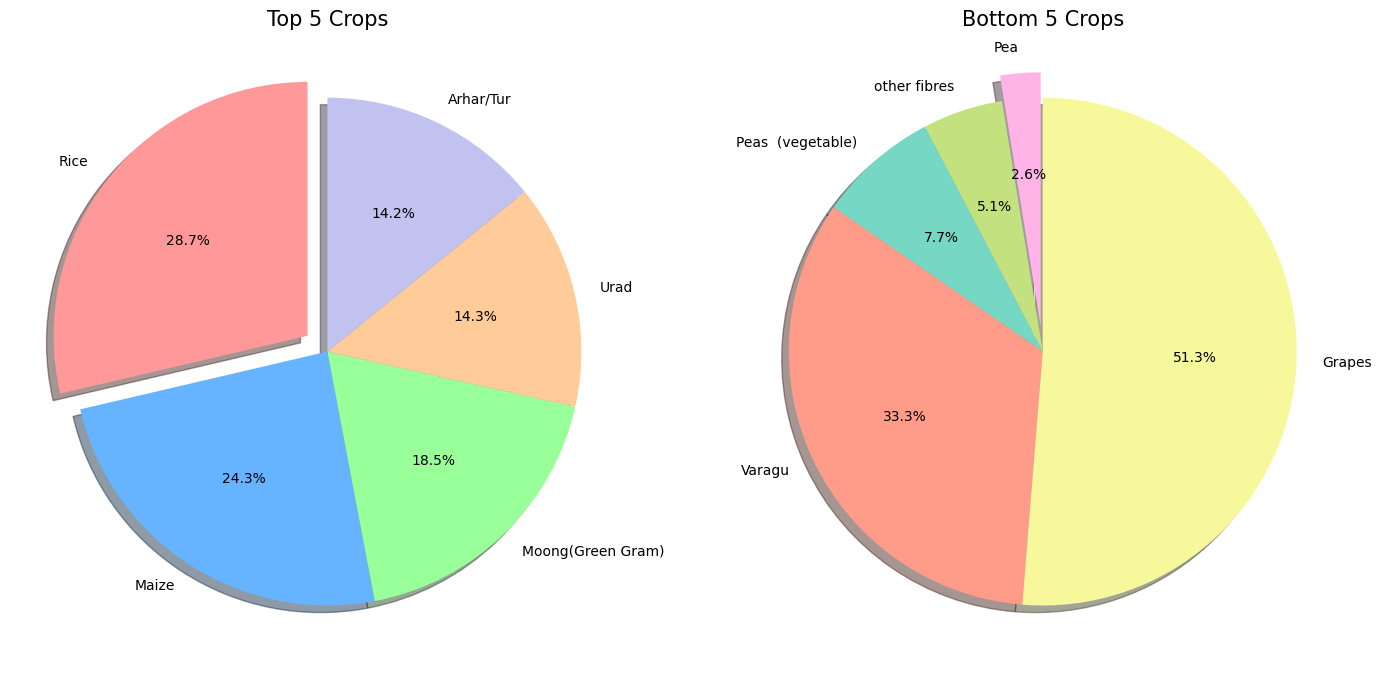

In [22]:
# Grouping and finding top 5 and bottom 5 crops
crop_counts = crops_per_year.groupby('Crop')['Count'].sum()
top5_crops = crop_counts.nlargest(5)
bottom5_crops = crop_counts.nsmallest(5)

colors_top = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0']
colors_bottom = ['#ffb3e6', '#c4e17f', '#76d7c4', '#ff9b89', '#f7f79c']

explode_top = (0.1, 0, 0, 0, 0)
explode_bottom = (0.1, 0, 0, 0, 0)

# Plotting the top 5 crops
plt.figure(figsize = (14, 7))

plt.subplot(1, 2, 1)
plt.pie(top5_crops, labels = top5_crops.index, autopct = '%1.1f%%', startangle = 90,
        colors = colors_top, explode = explode_top, shadow = True)
plt.title('Top 5 Crops', fontsize = 15)

# Plotting the bottom 5 crops
plt.subplot(1, 2, 2)
plt.pie(bottom5_crops, labels = bottom5_crops.index, autopct = '%1.1f%%', startangle = 90,
        colors = colors_bottom, explode = explode_bottom, shadow = True)
plt.title('Bottom 5 Crops', fontsize = 15)

plt.tight_layout()
plt.show()


In [23]:
max_production_per_season = df.groupby(['Season', 'Crop'])['Production'].max().reset_index()
max_production_per_season

,Season,Crop,Production
0,Autumn,Maize,154451.0
1,Autumn,Paddy,38519.0
2,Autumn,Rice,542692.0
3,Autumn,Sugarcane,889.2
4,Kharif,Arecanut,5239.0
...,...,...,...
195,Winter,Sannhamp,112.0
196,Winter,Sesamum,39.0
197,Winter,Sugarcane,122960.0
198,Winter,Sunflower,3.0


In [24]:
top7_production_per_season = max_production_per_season.head(7)
top7_production_per_season

,Season,Crop,Production
0,Autumn,Maize,154451.0
1,Autumn,Paddy,38519.0
2,Autumn,Rice,542692.0
3,Autumn,Sugarcane,889.2
4,Kharif,Arecanut,5239.0
5,Kharif,Arhar/Tur,88300.0
6,Kharif,Bajra,326000.0


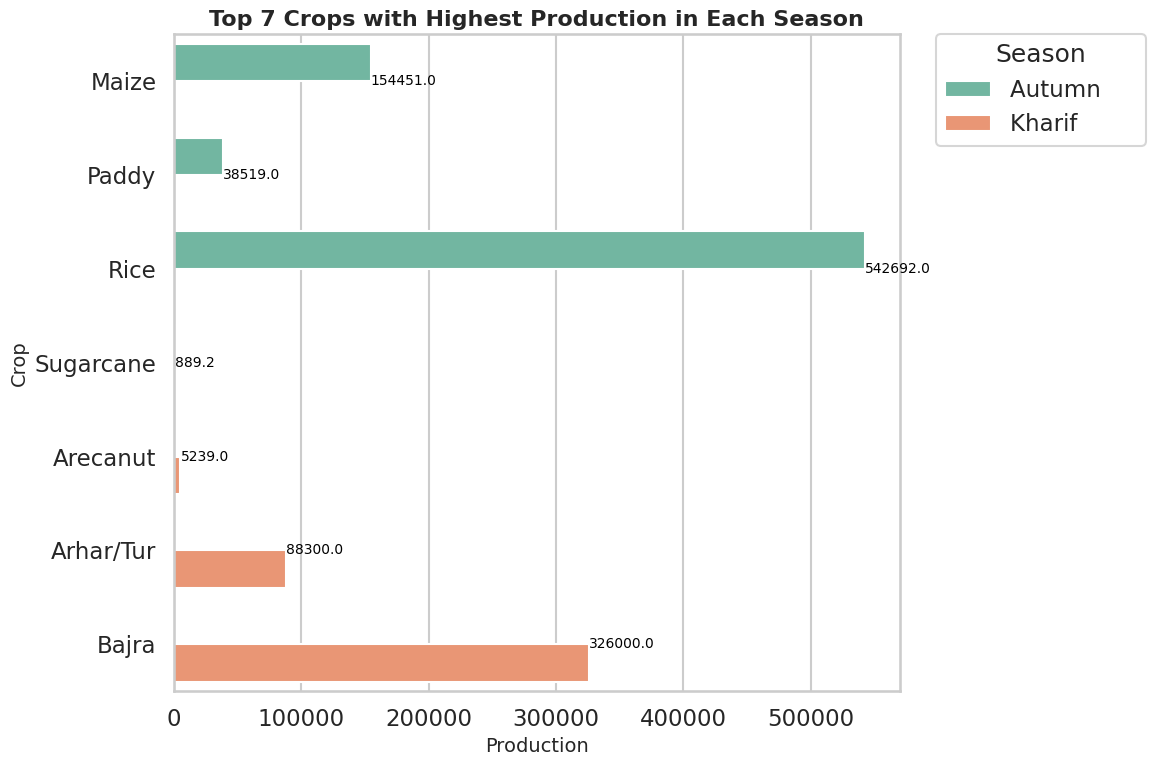

In [25]:
sns.set(style='whitegrid', context='talk')
palette = sns.color_palette("Set2")

plt.figure(figsize=(12, 8))

sns.barplot(x='Production', y='Crop', hue='Season', data=top7_production_per_season, dodge=True, palette=palette)
for index, row in top7_production_per_season.iterrows():
    plt.text(row['Production'], index, round(row['Production'], 2), color='black', ha='left', va='center', fontsize=10)

plt.legend(title='Season', bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)

plt.title('Top 7 Crops with Highest Production in Each Season', fontsize=16, fontweight='bold')
plt.xlabel('Production', fontsize=14)
plt.ylabel('Crop', fontsize=14)

plt.tight_layout()

plt.show()


In [18]:
bottom7_production_per_season = max_production_per_season.tail(7)
bottom7_production_per_season

,Season,Crop,Production
193,Winter,Rapeseed &Mustard,30.0
194,Winter,Rice,820981.0
195,Winter,Sannhamp,112.0
196,Winter,Sesamum,39.0
197,Winter,Sugarcane,122960.0
198,Winter,Sunflower,3.0
199,Winter,Wheat,1550.0


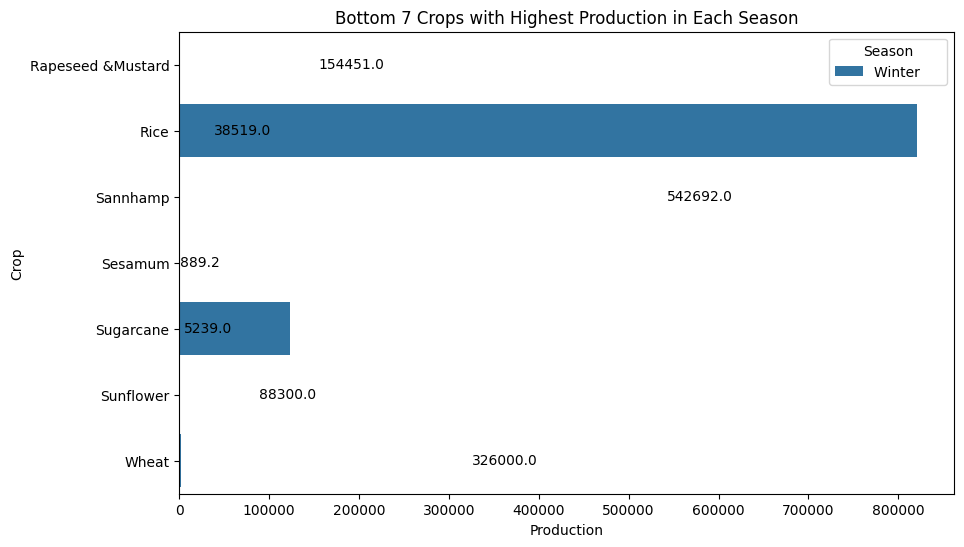

In [19]:
plt.figure(figsize = (10, 6))
sns.barplot(x = 'Production', y = 'Crop', hue = 'Season', data = bottom7_production_per_season, dodge = True)

# Displaying values on top of the bar
for index, value in enumerate(top7_production_per_season['Production']):
    plt.text(value, index, str(value), va = 'center')

plt.title('Bottom 7 Crops with Highest Production in Each Season')
plt.xlabel('Production')
plt.ylabel('Crop')
plt.show()

In [30]:
df['State_Name'].value_counts()

State_Name
Bihar                          18885
Assam                          14628
Chhattisgarh                   10709
Andhra Pradesh                  9628
Gujarat                         8436
Haryana                         3528
Arunachal Pradesh               2546
Dadra and Nagar Haveli           263
Goa                              208
Andaman and Nicobar Islands      203
Chandigarh                        90
Name: count, dtype: int64

In [31]:
len(df['State_Name'].value_counts())

11

In [32]:
state_production = df.groupby('State_Name')['Production'].sum().reset_index()

# Sort the DataFrame in descending order based on 'Production'
top10_state_production = state_production.sort_values(by = 'Production', ascending = False).head(10)

In [33]:
top10_state_production

,State_Name,Production
1,Andhra Pradesh,1.732459e+10
3,Assam,2.111752e+09
0,Andaman and Nicobar Islands,7.182232e+08
9,Gujarat,5.242913e+08
8,Goa,5.057558e+08
4,Bihar,3.664836e+08
10,Haryana,2.388944e+08
6,Chhattisgarh,1.009519e+08
2,Arunachal Pradesh,6.823913e+06
7,Dadra and Nagar Haveli,1.847871e+06


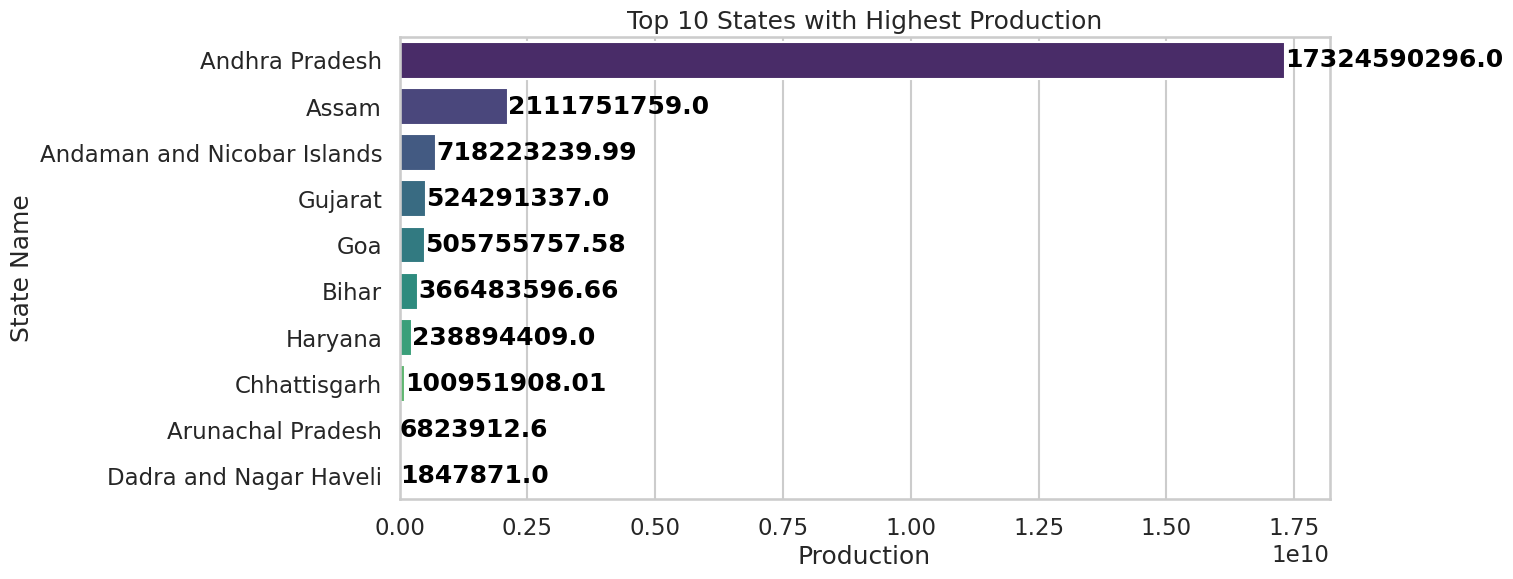

In [34]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Production', y = 'State_Name', data = top10_state_production, palette = 'viridis')

for index, value in enumerate(top10_state_production['Production']):
    plt.text(value, index, f'{value}',va = 'center', color = 'black', fontweight = 'bold')

plt.title('Top 10 States with Highest Production')
plt.xlabel('Production')
plt.ylabel('State Name')
plt.show()

In [35]:
df

,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
69119,Haryana,MEWAT,2005,Kharif,Urad,13.0,NaN
69120,Haryana,MEWAT,2005,Rabi,Barley,1873.0,6000.0
69121,Haryana,MEWAT,2005,Rabi,Gram,880.0,1000.0
69122,Haryana,MEWAT,2005,Rabi,Masoor,1031.0,500.0


In [36]:
district_production = df.groupby('District_Name')['Production'].sum().reset_index()

# Sort the DataFrame in descending order based on 'Production'
top10_district_production = district_production.sort_values(by = 'Production', ascending = False).head(10)

In [37]:
top10_district_production

,District_Name,Production
46,EAST GODAVARI,8.271057e+09
166,WEST GODAVARI,4.287727e+09
147,SRIKAKULAM,2.141621e+09
164,VISAKHAPATANAM,1.010412e+09
109,NAGAON,5.191852e+08
117,NICOBARS,5.007055e+08
165,VIZIANAGARAM,4.741696e+08
32,CHITTOOR,3.741366e+08
89,KRISHNA,3.694278e+08
145,SOUTH GOA,2.827961e+08


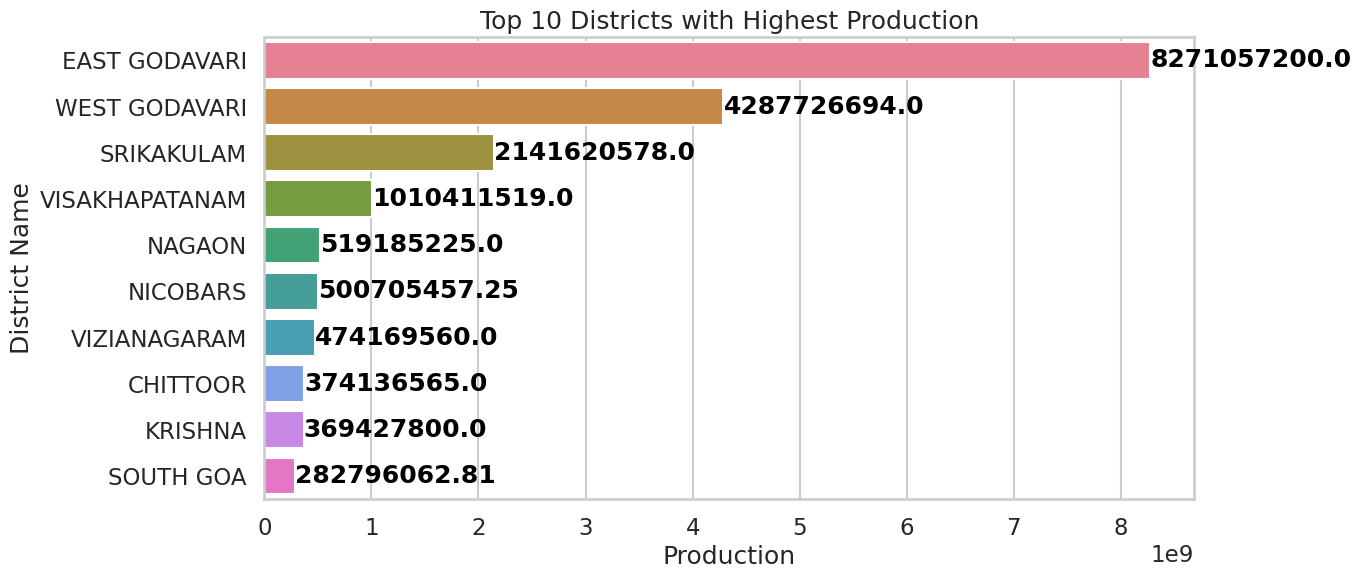

In [38]:
plt.figure(figsize = (12, 6))
sns.barplot(x = 'Production', y = 'District_Name', data = top10_district_production, palette = 'husl')

for index, value in enumerate(top10_district_production['Production']):
    plt.text(value, index, f'{value}',va = 'center', color = 'black', fontweight = 'bold')

plt.title('Top 10 Districts with Highest Production')
plt.xlabel('Production')
plt.ylabel('District Name')
plt.show()

In [39]:
crop_production = df.groupby('Crop')['Production'].sum().reset_index()

In [40]:
sorted_crop_production = crop_production.sort_values(by='Production', ascending=False)

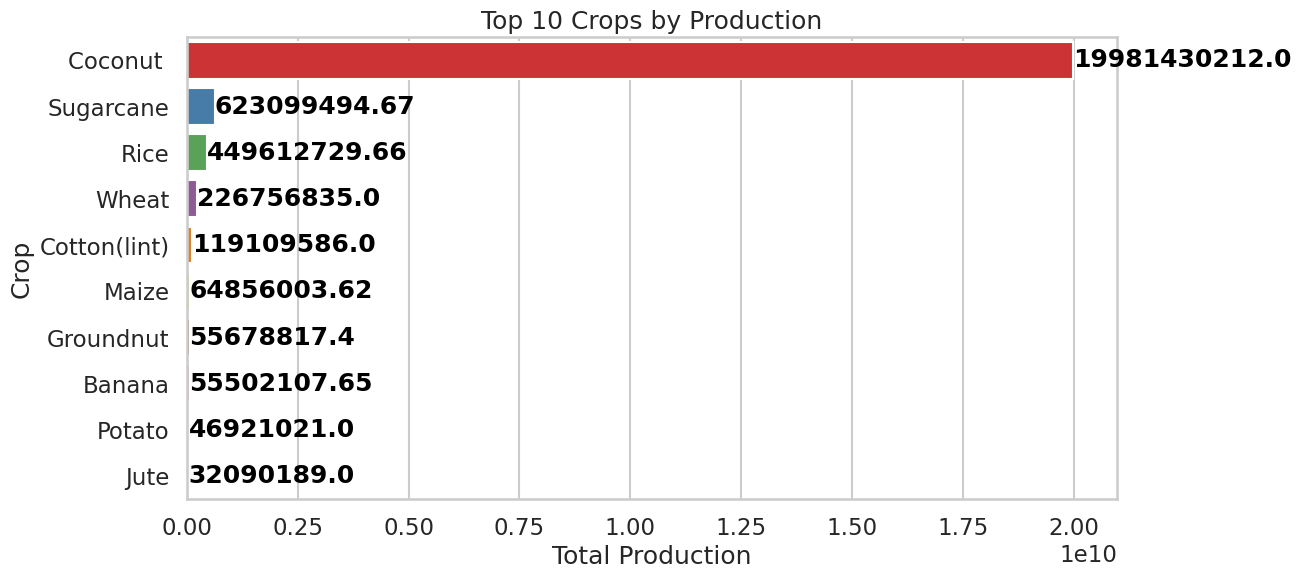

In [41]:
# Take the top 10 crops
top_10_crops = sorted_crop_production.head(10)

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(x='Production', y='Crop', data=top_10_crops, palette='Set1')

for index, value in enumerate(top_10_crops['Production']):
    plt.text(value, index, f'{value}',va = 'center', color = 'black', fontweight = 'bold')

plt.xlabel('Total Production')
plt.ylabel('Crop')
plt.title('Top 10 Crops by Production')
plt.show()

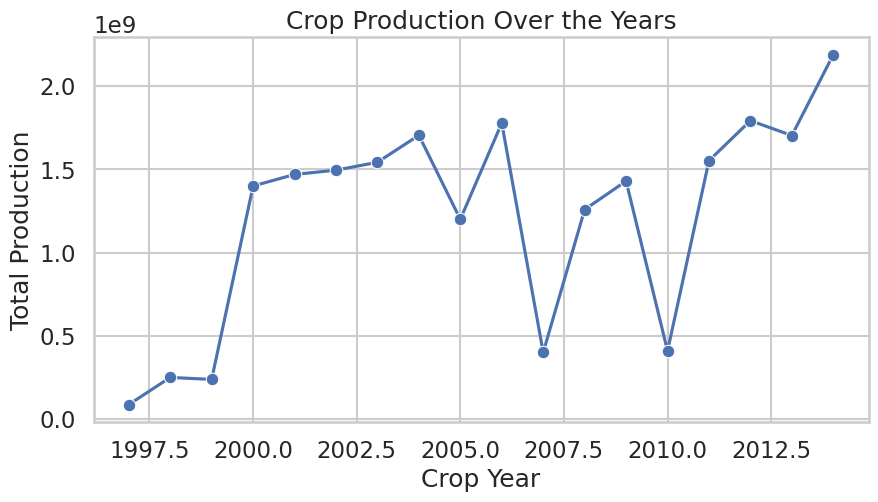

In [43]:
yearly_production = df.groupby('Crop_Year')['Production'].sum().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(x='Crop_Year', y='Production', data=yearly_production, marker='o', color='b')
plt.xlabel('Crop Year')
plt.ylabel('Total Production')
plt.title('Crop Production Over the Years')
plt.grid(True)
plt.show()